In [ ]:
#2. Sarcasm dataset contains records of sentences which can be sarcastic (labeled 1) or not (labeled 0). 
#The dataset contains 26709 samples. You can load the dataset and split the data by:

In [1]:
import json
with open ("sarcasm.json ",'r') as f:
    datastore = json.load (f)
sentences =[]
labels =[]
for item in datastore:
    sentences.append (item['headline'])
    labels.append(item['is_sarcastic'])
vocab_size = 10000
embedding_dim = 16
max_length = 100
oov_tok = ""
training_size = 20000
training_sentences = sentences [0: training_size ]
testing_sentences = sentences [ training_size :]
training_labels = labels [0: training_size ]
testing_labels = labels [ training_size :]

In [ ]:
#where some parameters are also set in advance for your convenience. 
#You should train an RNN while the validation data are set to be the test data by specifying validation data = (testing padded, testing labels) in the model.fit()function.
#(1) Train an RNN with vanilla RNN layer(s) and 30 epochs.

In [13]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from tensorflow.keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'be': 22, 'up': 23, 'out': 24, 'that': 25, 'how': 26, 'as': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'what': 32, 'his': 33, 'all': 34, 'he': 35, 'will': 36, 'who': 37, 'just': 38, 'has': 39, 'more': 40, 'one': 41, 'year': 42, 'into': 43, 'report': 44, 'have': 45, 'why': 46, 'over': 47, 'area': 48, 'u': 49, 'donald': 50, 'says': 51, 'day': 52, 'can': 53, 's': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'get': 59, 'old': 60, 'no': 61, 'her': 62, "trump's": 63, 'off': 64, 'now': 65, 'an': 66, 'obama': 67, 'life': 68, 'people': 69, 'women': 70, 'house': 71, "'": 72, 'was': 73, 'still': 74, 'white': 75, 'back': 76, 'make': 77, 'than': 78, 'clinton': 79, 'down': 80, 'when': 81, 'my': 82, '5': 83, 'could': 84, 'world': 85, 'americans': 86, 'if': 87, 'i': 88, '

In [21]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length)
print(training_padded.shape)
print(training_sentences[0])
print(training_padded[0])
print(training_padded[0].shape)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)
print(testing_padded.shape)

training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

(20000, 100)
former versace store clerk sues over secret 'black code' for minority shoppers
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  328    1  799 3405 2404   47  389 2214    1    6
 2614 8863]
(100,)
(6709, 100)


In [22]:
keras.utils.set_random_seed(2023)

model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 162385 (634.32 KB)
Trainable params: 162385 (634.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=30
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))

Epoch 1/30


625/625 [==============================] - 84s 106ms/step - loss: 0.4876 - acc: 0.7484 - val_loss: 0.4217 - val_acc: 0.7980
Epoch 2/30
625/625 [==============================] - 63s 101ms/step - loss: 0.3053 - acc: 0.8722 - val_loss: 0.3470 - val_acc: 0.8515
Epoch 3/30
625/625 [==============================] - 60s 95ms/step - loss: 0.2469 - acc: 0.9002 - val_loss: 0.3478 - val_acc: 0.8530
Epoch 4/30
625/625 [==============================] - 62s 99ms/step - loss: 0.2073 - acc: 0.9196 - val_loss: 0.3590 - val_acc: 0.8530
Epoch 5/30
625/625 [==============================] - 63s 101ms/step - loss: 0.1669 - acc: 0.9358 - val_loss: 0.3823 - val_acc: 0.8480
Epoch 6/30
625/625 [==============================] - 63s 101ms/step - loss: 0.1271 - acc: 0.9510 - val_loss: 0.4904 - val_acc: 0.8201
Epoch 7/30
625/625 [==============================] - 61s 97ms/step - loss: 0.0924 - acc: 0.9662 - val_loss: 0.5056 - val_acc: 0.8286
Epoch 8/30
625/625 [==============================] - 64

In [25]:
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

210/210 [==============================] - 2s 8ms/step - loss: 1.9628 - acc: 0.7721
Accuracy:  0.7720971703529358 
Test Loss:  1.962760090827942


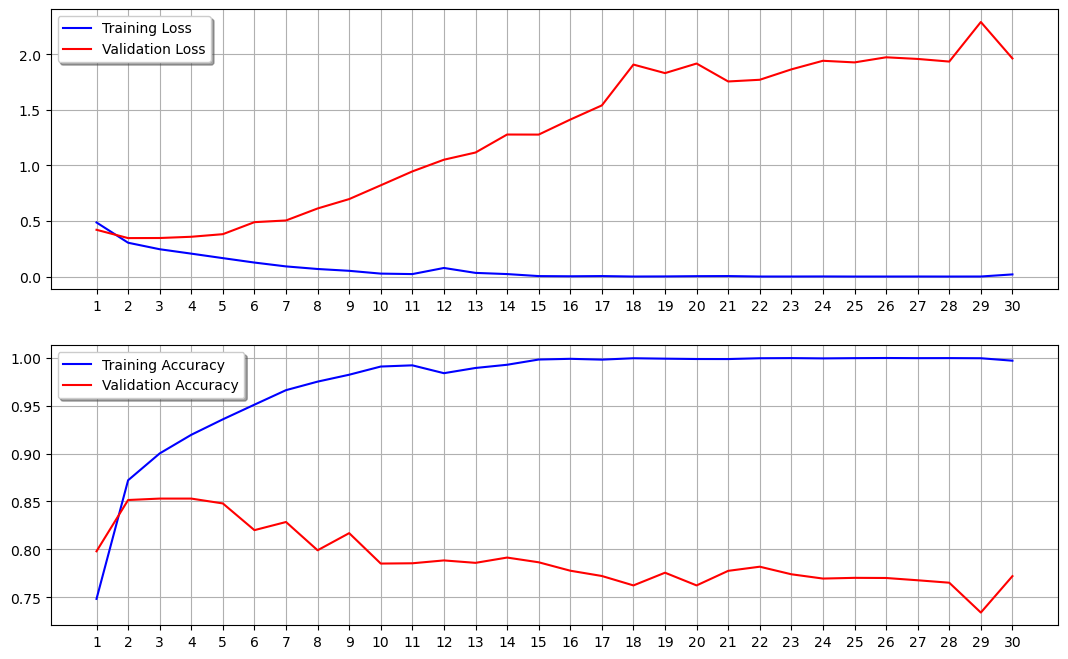

In [26]:
#plot the training and validation accuracy against number of epochs and the training and validation loss against number of epochs.
fig, ax=plt.subplots(2,1,figsize=(13,8))
plt.setp(ax, xticks=list(range(1,epochs+1)))
ax[0].plot(list(range(1,epochs+1)),history.history['loss'], color='b', label="Training Loss")
ax[0].plot(list(range(1,epochs+1)),history.history['val_loss'], color='r', label="Validation Loss")
legend=ax[0].legend(loc='best', shadow=True)
ax[0].grid()

ax[1].plot(list(range(1,epochs+1)),history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(list(range(1,epochs+1)),history.history['val_acc'], color='r',label="Validation Accuracy")
legend=ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [47]:
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 24s 36ms/step - loss: 0.5008 - acc: 0.7365 - val_loss: 0.3770 - val_acc: 0.8268
Epoch 2/5
625/625 [==============================] - 20s 31ms/step - loss: 0.3011 - acc: 0.8758 - val_loss: 0.3484 - val_acc: 0.8512
Epoch 3/5
625/625 [==============================] - 20s 32ms/step - loss: 0.2429 - acc: 0.9023 - val_loss: 0.3491 - val_acc: 0.8523
Epoch 4/5
625/625 [==============================] - 20s 32ms/step - loss: 0.1973 - acc: 0.9251 - val_loss: 0.3789 - val_acc: 0.8554
Epoch 5/5
210/210 [==============================] - 2s 10ms/step - loss: 0.3900 - acc: 0.8483
Accuracy:  0.8482635021209717 
Test Loss:  0.38996028900146484


In [46]:
#tune
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(layers.SimpleRNN(units=24))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 23s 33ms/step - loss: 0.5298 - acc: 0.7147 - val_loss: 0.4595 - val_acc: 0.7833
Epoch 2/5
625/625 [==============================] - 20s 32ms/step - loss: 0.3059 - acc: 0.8690 - val_loss: 0.3478 - val_acc: 0.8553
Epoch 3/5
625/625 [==============================] - 21s 33ms/step - loss: 0.2393 - acc: 0.9043 - val_loss: 0.3517 - val_acc: 0.8557
Epoch 4/5
625/625 [==============================] - 18s 29ms/step - loss: 0.1992 - acc: 0.9227 - val_loss: 0.3659 - val_acc: 0.8568
Epoch 5/5
210/210 [==============================] - 2s 9ms/step - loss: 0.3768 - acc: 0.8545
Accuracy:  0.854523777961731 
Test Loss:  0.37681517004966736


In [54]:
#tune
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(layers.SimpleRNN(units=24))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 12s 18ms/step - loss: 0.4846 - acc: 0.7555 - val_loss: 0.3773 - val_acc: 0.8272
Epoch 2/5
625/625 [==============================] - 12s 18ms/step - loss: 0.2953 - acc: 0.8752 - val_loss: 0.3468 - val_acc: 0.8529
Epoch 3/5
625/625 [==============================] - 12s 19ms/step - loss: 0.2420 - acc: 0.9024 - val_loss: 0.3457 - val_acc: 0.8590
Epoch 4/5
625/625 [==============================] - 14s 22ms/step - loss: 0.1976 - acc: 0.9225 - val_loss: 0.3527 - val_acc: 0.8606
Epoch 5/5
210/210 [==============================] - 1s 7ms/step - loss: 0.3746 - acc: 0.8536
Accuracy:  0.853629469871521 
Test Loss:  0.37456947565078735


In [49]:
#tune (best)
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(layers.SimpleRNN(units=16))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 28s 41ms/step - loss: 0.5031 - acc: 0.7355 - val_loss: 0.3717 - val_acc: 0.8338
Epoch 2/5
625/625 [==============================] - 20s 32ms/step - loss: 0.2922 - acc: 0.8782 - val_loss: 0.3503 - val_acc: 0.8515
Epoch 3/5
625/625 [==============================] - 21s 34ms/step - loss: 0.2345 - acc: 0.9056 - val_loss: 0.3326 - val_acc: 0.8550
Epoch 4/5
625/625 [==============================] - 23s 37ms/step - loss: 0.1991 - acc: 0.9233 - val_loss: 0.3576 - val_acc: 0.8568
Epoch 5/5
210/210 [==============================] - 2s 11ms/step - loss: 0.3571 - acc: 0.8574
Accuracy:  0.8573557734489441 
Test Loss:  0.35706034302711487


In [ ]:
#(2) Train an RNN with LSTM layer(s) and 30 epochs.

In [30]:
keras.utils.set_random_seed(2023)

model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.LSTM(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=30
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense_10 (Dense)            (None, 24)                792       
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 167089 (652.69 KB)
Trainable params: 167089 (652.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 20s 29ms/step - loss: 0.4990 - acc: 0.7407 - val_loss: 0.4083 - val_acc: 0.8074
Epoch 2/30
6

In [31]:
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

210/210 [==============================] - 7s 33ms/step - loss: 0.8990 - acc: 0.8207
Accuracy:  0.8206886053085327 
Test Loss:  0.8990017771720886


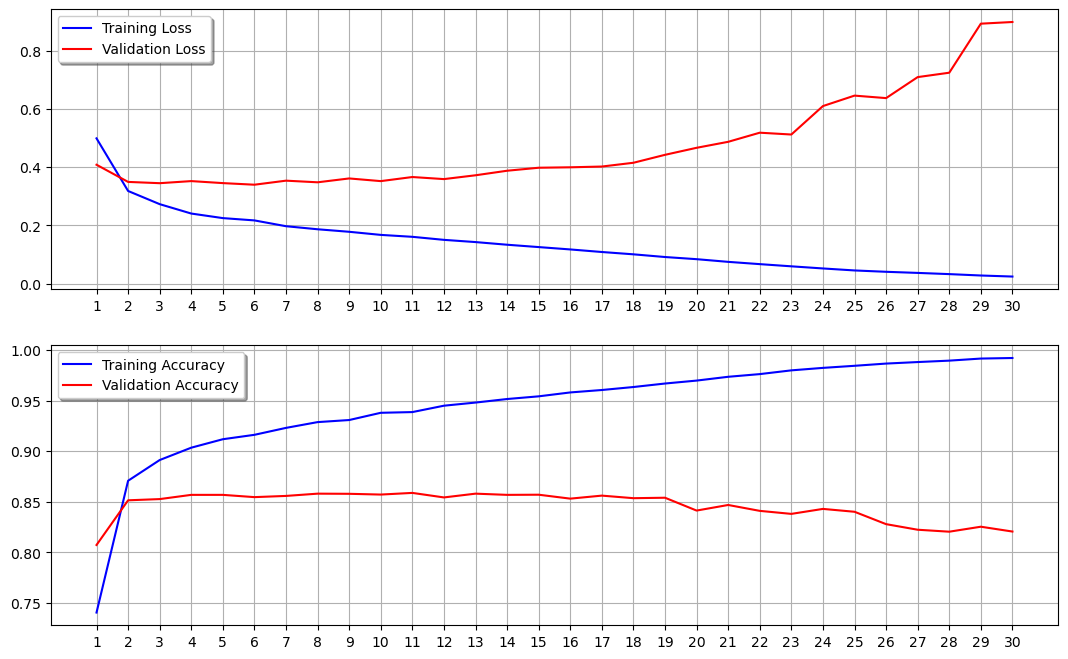

In [32]:
#plot the training and validation accuracy against number of epochs and the training and validation loss against number of epochs.
fig, ax=plt.subplots(2,1,figsize=(13,8))
plt.setp(ax, xticks=list(range(1,epochs+1)))
ax[0].plot(list(range(1,epochs+1)),history.history['loss'], color='b', label="Training Loss")
ax[0].plot(list(range(1,epochs+1)),history.history['val_loss'], color='r', label="Validation Loss")
legend=ax[0].legend(loc='best', shadow=True)
ax[0].grid()

ax[1].plot(list(range(1,epochs+1)),history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(list(range(1,epochs+1)),history.history['val_acc'], color='r',label="Validation Accuracy")
legend=ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [35]:
#tune 
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.LSTM(units=32))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 79s 104ms/step - loss: 0.4808 - acc: 0.7516 - val_loss: 0.3695 - val_acc: 0.8302
Epoch 2/5
625/625 [==============================] - 61s 98ms/step - loss: 0.3018 - acc: 0.8736 - val_loss: 0.3492 - val_acc: 0.8517
Epoch 3/5
625/625 [==============================] - 62s 99ms/step - loss: 0.2819 - acc: 0.8921 - val_loss: 0.3409 - val_acc: 0.8571
Epoch 4/5
625/625 [==============================] - 59s 94ms/step - loss: 0.2326 - acc: 0.9066 - val_loss: 0.3488 - val_acc: 0.8597
Epoch 5/5
210/210 [==============================] - 8s 35ms/step - loss: 0.3383 - acc: 0.8581
Accuracy:  0.8581010699272156 
Test Loss:  0.338297575712204


In [36]:
#tune (best)
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.LSTM(units=32, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 148s 198ms/step - loss: 0.4768 - acc: 0.7518 - val_loss: 0.3669 - val_acc: 0.8350
Epoch 2/5
625/625 [==============================] - 114s 182ms/step - loss: 0.3020 - acc: 0.8734 - val_loss: 0.3474 - val_acc: 0.8493
Epoch 3/5
625/625 [==============================] - 634s 1s/step - loss: 0.2578 - acc: 0.8949 - val_loss: 0.3349 - val_acc: 0.8591
Epoch 4/5
625/625 [==============================] - 78s 125ms/step - loss: 0.2258 - acc: 0.9100 - val_loss: 0.3458 - val_acc: 0.8575
Epoch 5/5
210/210 [==============================] - 8s 36ms/step - loss: 0.3382 - acc: 0.8611
Accuracy:  0.861082136631012 
Test Loss:  0.33819547295570374


In [52]:
#tune 
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.LSTM(units=32, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=32))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 71s 104ms/step - loss: 0.5055 - acc: 0.7299 - val_loss: 0.3740 - val_acc: 0.8329
Epoch 2/5
625/625 [==============================] - 62s 99ms/step - loss: 0.3129 - acc: 0.8681 - val_loss: 0.3552 - val_acc: 0.8474
Epoch 3/5
625/625 [==============================] - 66s 106ms/step - loss: 0.2634 - acc: 0.8913 - val_loss: 0.3419 - val_acc: 0.8545
Epoch 4/5
625/625 [==============================] - 66s 106ms/step - loss: 0.2349 - acc: 0.9045 - val_loss: 0.3532 - val_acc: 0.8581
Epoch 5/5
210/210 [==============================] - 9s 41ms/step - loss: 0.3404 - acc: 0.8596
Accuracy:  0.8595916032791138 
Test Loss:  0.3403935730457306


In [53]:
#tune 
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.LSTM(units=16, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=16))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 75s 109ms/step - loss: 0.5253 - acc: 0.7171 - val_loss: 0.3854 - val_acc: 0.8278
Epoch 2/5
625/625 [==============================] - 53s 85ms/step - loss: 0.3178 - acc: 0.8661 - val_loss: 0.3581 - val_acc: 0.8454
Epoch 3/5
625/625 [==============================] - 32s 52ms/step - loss: 0.2683 - acc: 0.8910 - val_loss: 0.3405 - val_acc: 0.8580
Epoch 4/5
625/625 [==============================] - 35s 55ms/step - loss: 0.2399 - acc: 0.9028 - val_loss: 0.3478 - val_acc: 0.8575
Epoch 5/5
210/210 [==============================] - 5s 22ms/step - loss: 0.3394 - acc: 0.8600
Accuracy:  0.8600387573242188 
Test Loss:  0.33939075469970703


In [ ]:
#(3) Train an RNN with GRU layer(s) and 30 epochs.

In [55]:
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.GRU(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=30
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 100, 16)           160000    
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 dense_40 (Dense)            (None, 24)                792       
                                                                 
 dense_41 (Dense)            (None, 1)                 25        
                                                                 
Total params: 165617 (646.94 KB)
Trainable params: 165617 (646.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 35s 53ms/step - loss: 0.4923 - acc: 0.7436 - val_loss: 0.3794 - val_acc: 0.8259
Epoch 2/30


In [56]:
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

210/210 [==============================] - 2s 11ms/step - loss: 0.8884 - acc: 0.8150
Accuracy:  0.8150246143341064 
Test Loss:  0.8883868455886841


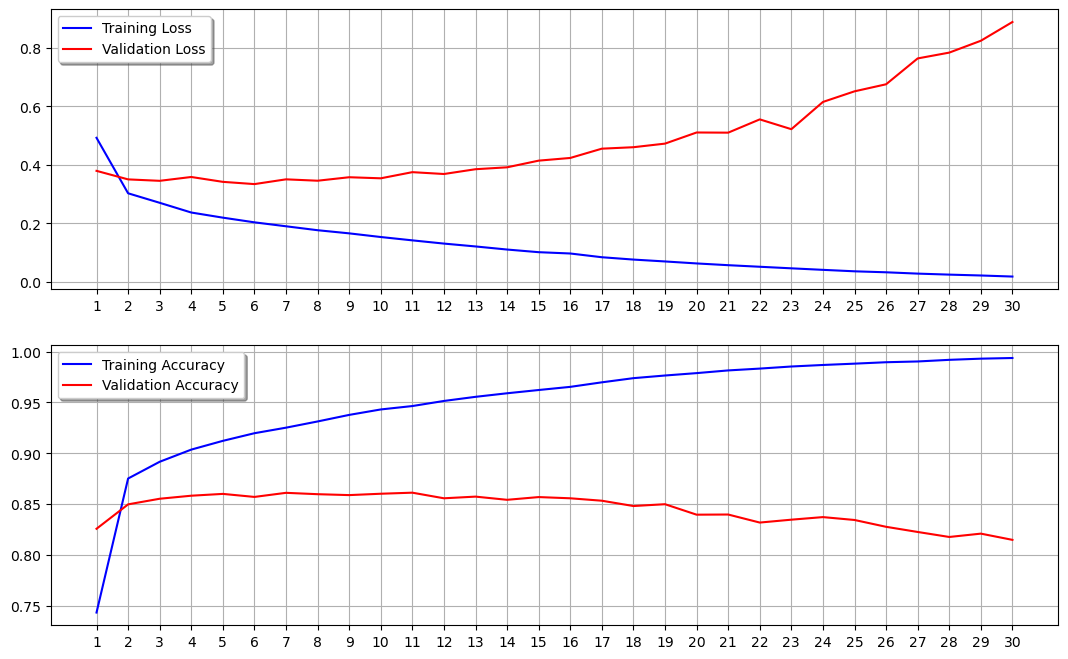

In [57]:
#plot the training and validation accuracy against number of epochs and the training and validation loss against number of epochs.
fig, ax=plt.subplots(2,1,figsize=(13,8))
plt.setp(ax, xticks=list(range(1,epochs+1)))
ax[0].plot(list(range(1,epochs+1)),history.history['loss'], color='b', label="Training Loss")
ax[0].plot(list(range(1,epochs+1)),history.history['val_loss'], color='r', label="Validation Loss")
legend=ax[0].legend(loc='best', shadow=True)
ax[0].grid()
ax[1].plot(list(range(1,epochs+1)),history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(list(range(1,epochs+1)),history.history['val_acc'], color='r',label="Validation Accuracy")
legend=ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [58]:
#tune
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.GRU(units=32, return_sequences=True))
model.add(tf.keras.layers.GRU(units=24))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))

Epoch 1/5
625/625 [==============================] - 68s 104ms/step - loss: 0.4625 - acc: 0.7643 - val_loss: 0.3703 - val_acc: 0.8357
Epoch 2/5
625/625 [==============================] - 61s 98ms/step - loss: 0.2986 - acc: 0.8754 - val_loss: 0.3456 - val_acc: 0.8538
Epoch 3/5
625/625 [==============================] - 60s 95ms/step - loss: 0.2558 - acc: 0.8964 - val_loss: 0.3446 - val_acc: 0.8569
Epoch 4/5
625/625 [==============================] - 59s 94ms/step - loss: 0.2323 - acc: 0.9057 - val_loss: 0.3617 - val_acc: 0.8572
Epoch 5/5
625/625 [==============================] - 61s 97ms/step - loss: 0.2287 - acc: 0.9129 - val_loss: 0.3398 - val_acc: 0.8587


In [59]:
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

210/210 [==============================] - 4s 20ms/step - loss: 0.3398 - acc: 0.8587
Accuracy:  0.8586972951889038 
Test Loss:  0.3397974669933319


In [60]:
#tune
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.GRU(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 21s 31ms/step - loss: 0.4923 - acc: 0.7436 - val_loss: 0.3794 - val_acc: 0.8259
Epoch 2/5
625/625 [==============================] - 19s 31ms/step - loss: 0.3027 - acc: 0.8753 - val_loss: 0.3502 - val_acc: 0.8499
Epoch 3/5
625/625 [==============================] - 22s 35ms/step - loss: 0.2702 - acc: 0.8917 - val_loss: 0.3453 - val_acc: 0.8554
Epoch 4/5
625/625 [==============================] - 23s 36ms/step - loss: 0.2369 - acc: 0.9037 - val_loss: 0.3584 - val_acc: 0.8584
Epoch 5/5
210/210 [==============================] - 3s 15ms/step - loss: 0.3418 - acc: 0.8602
Accuracy:  0.860187828540802 
Test Loss:  0.34179723262786865


In [61]:
#tune (best)
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.GRU(units=32, return_sequences=True))
model.add(tf.keras.layers.GRU(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=5
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/5
625/625 [==============================] - 40s 60ms/step - loss: 0.4646 - acc: 0.7637 - val_loss: 0.3714 - val_acc: 0.8366
Epoch 2/5
625/625 [==============================] - 41s 66ms/step - loss: 0.3016 - acc: 0.8731 - val_loss: 0.3470 - val_acc: 0.8548
Epoch 3/5
625/625 [==============================] - 47s 76ms/step - loss: 0.2568 - acc: 0.8945 - val_loss: 0.3424 - val_acc: 0.8572
Epoch 4/5
625/625 [==============================] - 59s 94ms/step - loss: 0.2292 - acc: 0.9081 - val_loss: 0.3564 - val_acc: 0.8615
Epoch 5/5
210/210 [==============================] - 8s 39ms/step - loss: 0.3319 - acc: 0.8644
Accuracy:  0.8643612861633301 
Test Loss:  0.33192557096481323


In [62]:
#tune:
keras.utils.set_random_seed(2023)
model=Sequential()
model.add(layers.InputLayer(input_shape=(max_length,)))
model.add(layers.Embedding(vocab_size,embedding_dim))
model.add(tf.keras.layers.GRU(units=32, return_sequences=True))
model.add(tf.keras.layers.GRU(units=32))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['acc'])
epochs=10
history=model.fit(training_padded,
                 training_labels_final,
                 epochs=epochs,
                 validation_data = (testing_padded, testing_labels_final))
test_loss, test_accuracy=model.evaluate(testing_padded, testing_labels_final)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/10
625/625 [==============================] - 40s 60ms/step - loss: 0.4646 - acc: 0.7637 - val_loss: 0.3714 - val_acc: 0.8366
Epoch 2/10
625/625 [==============================] - 38s 60ms/step - loss: 0.3016 - acc: 0.8731 - val_loss: 0.3470 - val_acc: 0.8548
Epoch 3/10
625/625 [==============================] - 47s 76ms/step - loss: 0.2568 - acc: 0.8945 - val_loss: 0.3424 - val_acc: 0.8572
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2292 - acc: 0.9081 - val_loss: 0.3564 - val_acc: 0.8615
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2120 - acc: 0.9183 - val_loss: 0.3319 - val_acc: 0.8644
Epoch 6/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1869 - acc: 0.9269 - val_loss: 0.3309 - val_acc: 0.8526
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.1699 - acc: 0.9338 - val_loss: 0.3664 - val_acc: 0.8584
Epoch 8/10
625/625 [==============================] - 57s 91m